In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.stats import t

In [2]:
def set_mpl_params():
    matplotlib.rcdefaults()
    matplotlib.rcParams['text.usetex'] = True            # Use LaTeX for text rendering

    # Update font settings
    matplotlib.rcParams.update({
        'font.family': 'serif',                          # Use serif font family
        'font.serif': 'Palatino',                        # Use Palatino as the standard font
        'text.latex.preamble': r'\usepackage{amsmath} \usepackage{mathpazo}',  # Use the amsmath and mathpazo package for LaTeX
    })

    # Customize the figure size
    matplotlib.rcParams['figure.figsize'] = (8, 6)   # Set the default figure size

    # Customize axes
    matplotlib.rcParams['axes.labelsize'] = 24       # Axis label font size
    matplotlib.rcParams['axes.titlesize'] = 24       # Axis title font size
    matplotlib.rcParams['axes.titlepad'] = 15        # Axis title padding
    matplotlib.rcParams['axes.linewidth'] = 1.5        # Axis line width

    # Customize ticks
    matplotlib.rcParams['xtick.labelsize'] = 20      # X-axis tick label size
    matplotlib.rcParams['ytick.labelsize'] = 20      # Y-axis tick label size
    matplotlib.rcParams['xtick.major.width'] = 1.2   # X-axis major tick width
    matplotlib.rcParams['ytick.major.width'] = 1.2   # Y-axis major tick width
    matplotlib.rcParams['xtick.minor.size'] = 4      # X-axis minor tick size
    matplotlib.rcParams['ytick.minor.size'] = 4      # Y-axis minor tick size
    matplotlib.rcParams['xtick.major.size'] = 8      # X-axis major tick size
    matplotlib.rcParams['ytick.major.size'] = 8      # Y-axis major tick size

    # Customize legend
    matplotlib.rcParams['legend.fontsize'] = 20      # Legend font size
    matplotlib.rcParams['legend.frameon'] = True     # Enable/Disable the frame around the legend

    # Customize grid
    matplotlib.rcParams['grid.color'] = 'gray'       # Grid color
    matplotlib.rcParams['grid.linestyle'] = '-'      # Grid line style
    matplotlib.rcParams['grid.linewidth'] = 0.5      # Grid line width

    # Customize lines
    matplotlib.rcParams['lines.linewidth'] = 2.5       # Line width
    matplotlib.rcParams['lines.markersize'] = 10       # Marker size

    # Change figure and axes background colors
    matplotlib.rcParams['figure.facecolor'] = 'white'    # Figure background color
    matplotlib.rcParams['axes.facecolor'] = 'white'      # Axes background color
    
set_mpl_params()

In [ ]:
def plot_pe_vs_a(filepath, linecolor="skyblue", save=False, filename=None):
    pe_vs_a = pd.read_csv(filepath, sep=" ", header=None, names=["lattice_constant", "potential_energy"])
    pe_vs_a = pe_vs_a.sort_values(by="lattice_constant")
    print(f"Optimal Lattice Constant: {pe_vs_a['lattice_constant'][pe_vs_a['potential_energy'].idxmin()]}")

    plt.figure(figsize=(8, 6))
    plt.plot(pe_vs_a["lattice_constant"], 
            pe_vs_a["potential_energy"], 
            marker="o", 
            color=linecolor, 
            linestyle="--", 
            linewidth=2, 
            markerfacecolor="None", 
            markeredgecolor="black", 
            markeredgewidth=1, 
            markersize=7)

    plt.plot(pe_vs_a["lattice_constant"][pe_vs_a["potential_energy"].idxmin()], 
            pe_vs_a["potential_energy"].min(), 
            marker="o", 
            color="red", 
            markersize=10, 
            markeredgecolor="black", 
            markeredgewidth=1,
            linestyle="None",
            label=rf"$a_{{\rm opt}} = {pe_vs_a['lattice_constant'][pe_vs_a['potential_energy'].idxmin()]:.3f}$ $\rm \AA$")

    plt.xlabel(r"\textbf{Lattice Constant [$\rm \AA$]}")
    plt.ylabel(r"\textbf{Potential Energy [eV]}")
    plt.xlim(min(pe_vs_a["lattice_constant"]) - 0.015, max(pe_vs_a["lattice_constant"]) + 0.015)
    plt.ylim(min(pe_vs_a["potential_energy"]) - 0.015, max(pe_vs_a["potential_energy"]) + 0.015)
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.legend() 
    plt.tight_layout()

    if save:
        dir = "Figures/"
        plt.savefig(dir + filename + ".pdf", format="pdf")
    
    plt.show()

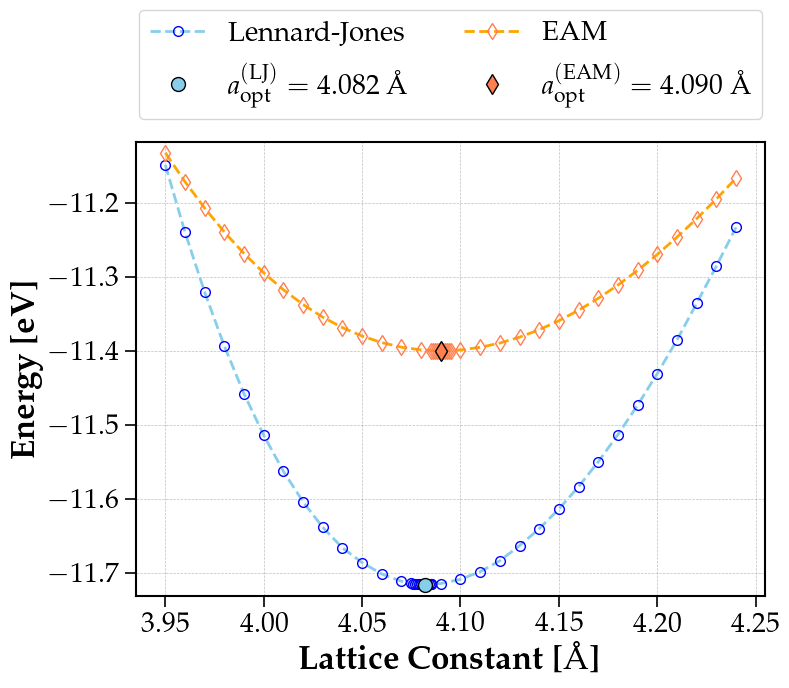

In [3]:
pe_vs_a_lj = pd.read_csv("A/energy_volume.dat", sep=" ", header=None, names=["lattice_constant", "potential_energy"])
pe_vs_a_lj = pe_vs_a_lj.sort_values(by="lattice_constant")

pe_vs_a_eam = pd.read_csv("B/energy_volume.dat", sep=" ", header=None, names=["lattice_constant", "potential_energy"])
pe_vs_a_eam = pe_vs_a_eam.sort_values(by="lattice_constant")

plt.figure(figsize=(8, 7))
plt.plot(pe_vs_a_lj["lattice_constant"],
            pe_vs_a_lj["potential_energy"],
            marker="o",
            color="skyblue",
            linestyle="--",
            linewidth=2,
            markerfacecolor="None",
            markeredgecolor="blue",
            markeredgewidth=1,
            markersize=7,
            label="Lennard-Jones")

plt.plot(pe_vs_a_lj["lattice_constant"][pe_vs_a_lj["potential_energy"].idxmin()],
            pe_vs_a_lj["potential_energy"].min(),
            marker="o",
            color="skyblue",
            markersize=10,
            markeredgecolor="black",
            markeredgewidth=1,
            linestyle="None",
            label=rf"$a_{{\rm opt}}^{{\rm (LJ)}} = {pe_vs_a_lj['lattice_constant'][pe_vs_a_lj['potential_energy'].idxmin()]:.3f}$ $\rm \AA$")

plt.plot(pe_vs_a_eam["lattice_constant"],
            pe_vs_a_eam["potential_energy"],
            marker="d",
            color="orange",
            linestyle="--",
            linewidth=2,
            markerfacecolor="None",
            markeredgecolor="coral",
            markeredgewidth=1,
            markersize=8,
            label="EAM")

plt.plot(pe_vs_a_eam["lattice_constant"][pe_vs_a_eam["potential_energy"].idxmin()],
            pe_vs_a_eam["potential_energy"].min(),
            marker="d",
            color="coral",
            markersize=10,
            markeredgecolor="black",
            markeredgewidth=1,
            linestyle="None",
            label=rf"$a_{{\rm opt}}^{{\rm (EAM)}} = {pe_vs_a_eam['lattice_constant'][pe_vs_a_eam['potential_energy'].idxmin()]:.3f}$ $\rm \AA$")

plt.xlabel(r"\textbf{Lattice Constant [$\rm \AA$]}")
plt.ylabel(r"\textbf{Energy [eV]}")
plt.xlim(min(pe_vs_a_lj["lattice_constant"]) - 0.015, max(pe_vs_a_lj["lattice_constant"]) + 0.015)
plt.ylim(min(min(pe_vs_a_lj["potential_energy"]) - 0.015, min(pe_vs_a_eam["potential_energy"]) - 0.015), 
         max(max(pe_vs_a_lj["potential_energy"]) + 0.015, max(pe_vs_a_eam["potential_energy"]) + 0.015))
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.02), ncol=2)
plt.tight_layout()

plt.savefig("Figures/pe_vs_a_lj_and_eam.pdf", format="pdf")

plt.show()

Optimal Lattice Constant: 4.082


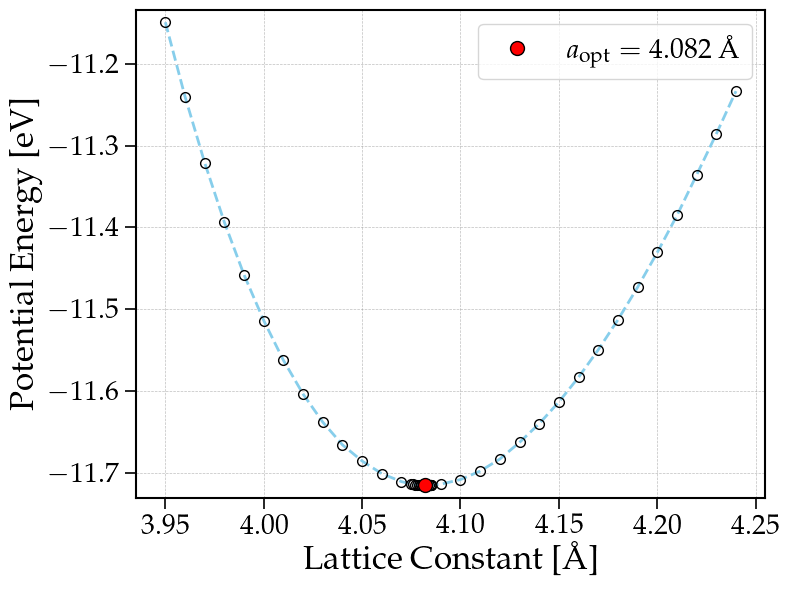

In [9]:
# Part A 
# Potential Energy vs Lattice Constant
plot_pe_vs_a("A/energy_volume.dat", linecolor="skyblue", save=True, filename="Lennard-Jones-Potential-Energy-vs-Lattice-Constant")

Optimal Lattice Constant: 4.09


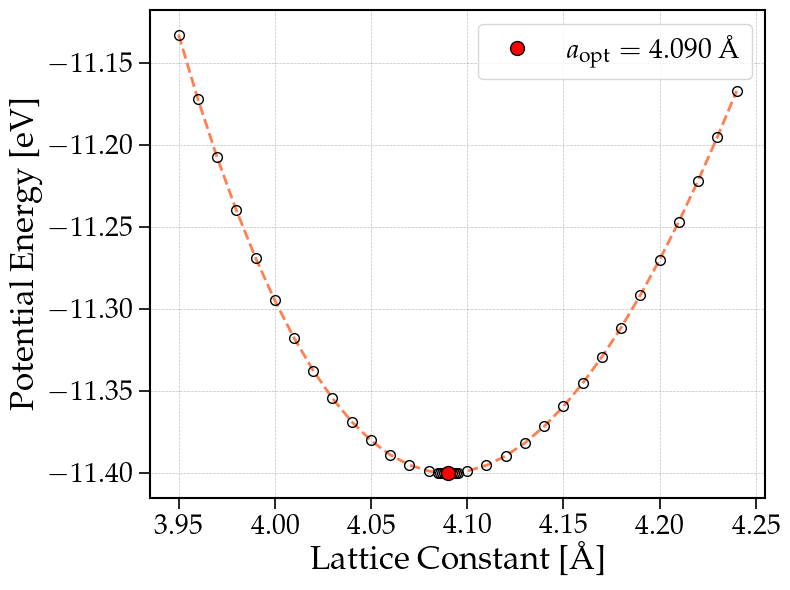

In [10]:
# Part B
plot_pe_vs_a("B/energy_volume.dat", linecolor="coral", save=True, filename="Morse-Potential-Energy-vs-Lattice-Constant")

In [5]:
def birch_murnaghan(V, E0, B0, B0_prime, V0):
    return E0 + (9/8)*B0*V0*((V0/V)**(2/3) - 1)**2 + (9/16)*B0*V0*(B0_prime - 4)*((V0/V)**(2/3) - 1)**3

In [6]:
lower = 0
upper = 10

data = pd.read_csv("B/energy_volume.dat", sep=" ", header=None, names=["lattice_constant", "potential_energy"]).sort_values(by="lattice_constant")
mask = (lower < data["lattice_constant"]) & (data["lattice_constant"] < upper)
data = data[mask]

V_data = data["lattice_constant"]**3
E_data = data["potential_energy"]

initial_guess = [E_data.min(), 1, 1, V_data.mean()]
params, covariance = curve_fit(birch_murnaghan, V_data, E_data, p0=initial_guess)
E0_fit, B0_fit, B0_prime_fit, V0_fit = params
std_errors = np.sqrt(np.diag(covariance))

dof = len(V_data) - len(params)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, dof)
confidence_intervals = [(param - t_critical * std_error, param + t_critical * std_error) for param, std_error in zip(params, std_errors)]


In [7]:
for label, param, std_error, conf_interval in zip(["E0 [eV]", "B0 [eV/A^3]", "B0prime", "V0 [A^3]"],params, std_errors, confidence_intervals):
    print(f"{label} = {param:.6f} +/- {param - conf_interval[0]:.6f} (95% CI: {conf_interval[0]:.6f}, {conf_interval[1]:.6f}), error = {param - conf_interval[0]:.6f}")

E0 [eV] = -11.399971 +/- 0.000019 (95% CI: -11.399990, -11.399952), error = 0.000019
B0 [eV/A^3] = 0.646304 +/- 0.000125 (95% CI: 0.646178, 0.646429), error = 0.000125
B0prime = 4.886781 +/- 0.011889 (95% CI: 4.874892, 4.898670), error = 0.011889
V0 [A^3] = 68.418037 +/- 0.001067 (95% CI: 68.416970, 68.419104), error = 0.001067


In [8]:
angstrom = 1e-10 
eV = 1.602176634e-19
conversion_factor = eV / angstrom**3

error =( B0_fit - confidence_intervals[1][0])*conversion_factor * 1e-9
print(error)

print(conversion_factor)
print(f"B0 = ({B0_fit * conversion_factor*1e-9:.2f} +/- {error}) GPa")

0.020106717477575232
160217663399.99997
B0 = (103.55 +/- 0.020106717477575232) GPa


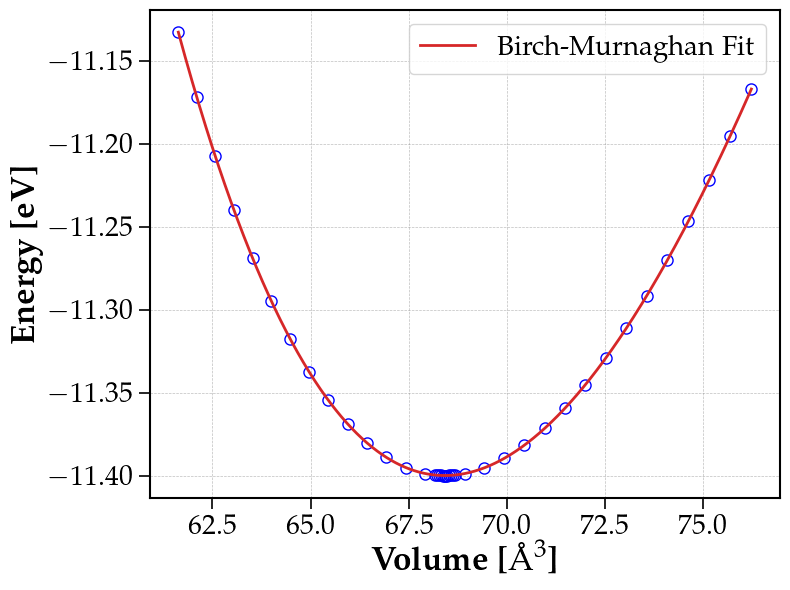

In [9]:
V_fit = np.linspace(min(V_data), max(V_data), 1000)
E_fit = birch_murnaghan(V_fit, *params)

plt.figure(figsize=(8, 6))
plt.plot(V_data, E_data, marker="o", color="#1f77b4", linestyle="None", linewidth=2, markerfacecolor="None", markeredgecolor="blue", markeredgewidth=1, markersize=8)
plt.plot(V_fit, E_fit, color="#d62728", linewidth=2, label=r"Birch-Murnaghan Fit")
plt.xlabel(r"\textbf{Volume [$\rm \AA^3$]}")
plt.ylabel(r"\textbf{Energy [eV]}")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()

plt.savefig("Figures/birch_murnaghan_fit.pdf", format="pdf")

plt.show()